## Classifying Documents using Naive Bayes,Random Forest, linear and non-linear SVM

In [2]:
import nltk
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('C:/Users/dell/Desktop/Other Projects/jobs-on-naukricom/job_classification.csv')

In [4]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [5]:
print("The data-set has %d rows and %d columns"%(data.shape[0],data.shape[1]))

The data-set has 22000 rows and 14 columns


## Search for Missing Values

In [6]:
for col_name in data.columns:
    print (col_name,end=": ")
    print (sum(data[col_name].isnull()))

company: 4
education: 1996
experience: 4
industry: 5
jobdescription: 4
jobid: 0
joblocation_address: 501
jobtitle: 0
numberofpositions: 17536
payrate: 97
postdate: 23
site_name: 18013
skills: 528
uniq_id: 0


In [7]:
data.drop(['numberofpositions','site_name'],axis=1,inplace=True)

In [8]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,payrate,postdate,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [9]:
data["industry"].fillna("Not Available", inplace = True)

In [10]:
data["jobdescription"].fillna("Not Available", inplace = True)

In [11]:
for col_name in data.columns:
    print (col_name,end=": ")
    print (sum(data[col_name].isnull()))

company: 4
education: 1996
experience: 4
industry: 0
jobdescription: 0
jobid: 0
joblocation_address: 501
jobtitle: 0
payrate: 97
postdate: 23
skills: 528
uniq_id: 0


## Class Distribution

In [12]:
data.describe(include='all')

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,payrate,postdate,skills,uniq_id
count,21996,20004,21996,22000,22000,2.200000e+04,21499,22000,21903,21977,21472,22000
unique,8469,2355,147,64,21064,NaN,2329,17564,1848,4203,45,22000
top,Indian Institute of Technology Bombay,"UG: Any Graduate - Any Specialization, Graduat...",2 - 7 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Adver...,NaN,Bengaluru/Bangalore,Business Development Executive,Not Disclosed by Recruiter,2016-05-21 08:24:31 +0000,IT Software - Application Programming,97093cfed7aa3ea7908b133d6f7470d1
freq,403,2015,1712,9216,121,NaN,3775,93,15849,48,5989,1
mean,NaN,NaN,NaN,NaN,NaN,1.561171e+11,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,9.423956e+10,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.011600e+10,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,6.121650e+10,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.602169e+11,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.502166e+11,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Duplicate values

In [13]:
sum(data.duplicated())

0

## Finding out the value distribution profile for the Job Category variable

In [14]:
category_counter={x:0 for x in set(data['industry'])}

In [15]:
for each_cat in data['industry']:
    category_counter[each_cat]+=1

In [16]:
print(category_counter)

{'Security / Law Enforcement': 30, 'FMCG / Foods / Beverage': 220, 'Retail / Wholesale': 184, 'Media / Entertainment / Internet': 275, 'Telecom/ISP': 89, 'Consumer Electronics / Appliances / Durables': 156, 'Fertilizers / Pesticides': 7, 'Medical Devices / Equipments': 4, 'Medical / Healthcare / Hospitals': 495, 'KPO / Research / Analytics': 113, 'Other': 339, 'Animation / Gaming': 24, 'Automobile / Auto Anciliary / Auto Components': 478, 'Telecom/ISP /': 207, 'Courier / Transportation / Freight / Warehousing': 106, 'Industrial Products / Heavy Machinery': 307, 'Printing / Packaging': 39, 'Recruitment / Staffing': 1129, 'Banking / Financial Services / Broking': 1238, 'Government / Defence': 19, 'Publishing': 44, 'Pharma / Biotech / Clinical Research': 525, 'Construction / Engineering / Cement / Metals': 449, 'Office Equipment / Automation': 13, 'Food Processing': 18, 'BPO / Call Centre / ITES': 1254, 'Internet / Ecommerce': 738, 'Fresher / Trainee / Entry Level': 18, 'Accounting / Fina

In [17]:
skills_counter={x:0 for x in set(data['skills'])}

In [18]:
for each_skills in data['skills']:
    skills_counter[each_skills]+=1

In [19]:
skills_counter

{nan: 528,
 'Teaching': 1091,
 'Sales': 2893,
 'IT Software - Mainframe': 15,
 'IT Software - eCommerce': 336,
 'IT Software - Other': 407,
 'IT Software - DBA': 273,
 'Strategy': 80,
 'IT Software - QA & Testing': 342,
 'IT Software - System Programming': 176,
 'IT Software - ERP': 354,
 'Defence Forces': 13,
 'IT Software - Middleware': 23,
 'Beauty/Fitness/Spa Services': 3,
 'IT Software - Client/Server Programming': 62,
 'Medical': 418,
 'Production': 667,
 'IT Software - Telecom Software': 114,
 'Supply Chain': 232,
 'Executive Assistant': 172,
 'Journalism': 252,
 'Travel': 90,
 'IT Software - Embedded': 262,
 'Fashion Designing': 59,
 'Top Management': 76,
 'Analytics & Business Intelligence': 190,
 'IT Software - Network Administration': 372,
 'Hotels': 161,
 'IT Software - Application Programming': 5989,
 'Engineering Design': 382,
 'HR': 928,
 'Legal': 78,
 'Architecture': 56,
 'Marketing': 868,
 'Financial Services': 413,
 'IT Software - Mobile': 203,
 'Accounts': 860,
 'Shi

## Lexical Analysis of the text data

In [20]:
desc=data.describe()
corpus=desc

In [21]:
all_words=[w.split() for w in corpus]

all_flat_words=[ewords for words in all_words for ewords in words]

from nltk.corpus import stopwords

all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
#removing all the stop words from the corpus

set_nf=set(all_flat_words_ns)

In [22]:
print("Number of unique vocabulary words in the text_description column of the dataframe: %d"%len(set_nf))

Number of unique vocabulary words in the text_description column of the dataframe: 1


## Data Pre-Processing

In [23]:
##converting to lowercase
data['jobdescription'] = data['jobdescription'].apply(lambda x: " ".join(x.lower() for x in x.split()))  
data['industry'] = data['industry'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['jobtitle'] = data['jobtitle'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [24]:
##Lemmatization
from textblob import Word
data['jobdescription'] = data['jobdescription'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['industry'] = data['industry'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['jobtitle'] = data['jobtitle'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Learning Classifiers, Making Predictions and Validating Results

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer   ##tf-idf
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['jobdescription'])
data_vect
tfidf_names=tfidf.get_feature_names()
print("Number of TFIDF Features: %d"%len(tfidf_names))

Number of TFIDF Features: 1000


In [26]:
data_vect2 = tfidf.fit_transform(data['industry'])
data_vect2
tfidf_names2=tfidf.get_feature_names()
print("Number of TFIDF Features: %d"%len(tfidf_names2))

Number of TFIDF Features: 156


In [27]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

In [28]:
variables = data_vect2
#considering the TFIDF features as independent variables to be input to the classifier.
labels = data.industry
#considering the category values as the class labels for the classifier.

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)

In [29]:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (15400, 156)
Shape of Test Data: (6600, 156)


## Applying Naive Bayes

In [30]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [31]:
from sklearn.naive_bayes import BernoulliNB
bnb_classifier=BernoulliNB()
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0

In [32]:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [33]:
prediction_time_container['b_naive_bayes']

0.008933305740356445

In [34]:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [35]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.986212
Training Time: 0.190793
Prediction Time: 0.008933


In [36]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[64,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  0,  0, ...,  0,  1,  0]], dtype=int64)

In [37]:
print("Classification Metrics: ")
print(sklearn.metrics.classification_report(labels_test,bnb_predictions))

Classification Metrics: 
                                                         precision    recall  f1-score   support

                                   accounting / finance       1.00      1.00      1.00        64
               advertising / pr / mr / event management       1.00      1.00      1.00        80
                                    agriculture / dairy       1.00      1.00      1.00        15
                                     animation / gaming       1.00      1.00      1.00         6
                         architecture / interior design       1.00      1.00      1.00        15
           automobile / auto anciliary / auto component       1.00      1.00      1.00       132
                              aviation / aerospace firm       1.00      1.00      1.00        10
                  banking / financial service / broking       1.00      1.00      1.00       375
                               bpo / call centre / ites       1.00      1.00      1.00       353
    

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [39]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.975152
Training Time: 0.227616s
Prediction Time: 0.011582s


## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

Training Time: 0.521030s
Prediction Time: 0.341866s
Accuracy Score of Random Forests Classifier: 
0.994848484848
[[64  0  0 ...,  0  0  0]
 [ 0 80  0 ...,  0  0  0]
 [ 0  0 15 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  2  0  0]
 [ 0  0  0 ...,  0 11  0]
 [ 0  0  0 ...,  0  0  1]]


## SVM using stochastic Gradient Descent

In [41]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training Time: 0.676548s
Prediction Time: 0.010617s
Accuracy Score of Linear SVM Classifier: 0.994697
[[64  0  0 ...,  0  0  0]
 [ 0 80  0 ...,  0  0  0]
 [ 0  0 15 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  2  0  0]
 [ 0  0  0 ...,  0 11  0]
 [ 0  0  0 ...,  0  0  1]]


## SVM with non-linear Kernel

In [42]:
from sklearn.svm import SVC

nl_svm_classifier=SVC(C=1000000.0, gamma='auto', kernel='rbf')

t0=time()
nl_svm_classifier=nl_svm_classifier.fit(variables_train,labels_train)
training_time_container['non_linear_svm']=time()-t0

t0=time()
nl_svm_predictions=nl_svm_classifier.predict(variables_test)
prediction_time_container['non_linear_svm']=time()-t0

accuracy_container['non_linear_svm']=sklearn.metrics.accuracy_score(labels_test,nl_svm_predictions)

print("Accuracy score of Non-Linear SVM: %f"%accuracy_container['linear_svm'])

Accuracy score of Non-Linear SVM: 0.994697


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

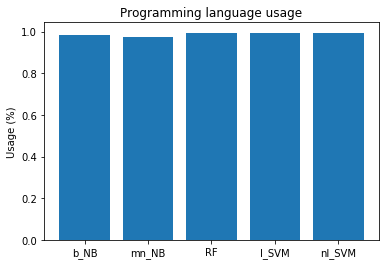

In [44]:
labels = ['b_NB', 'mn_NB', 'RF', 'l_SVM', 'nl_SVM']
usage = accuracy_container.values()

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))

# Creating our bar plot
plt.bar(y_positions, usage)

plt.xticks(y_positions, labels)
plt.ylabel("Usage (%)")
plt.title("Programming language usage")
plt.show()

## Cross-Validation

In [49]:
from sklearn import cross_validation

In [50]:
mn_bayes=MultinomialNB()
cv_scores = cross_validation.cross_val_score(mn_bayes, variables_train, labels_train, cv=5)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [51]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
cv_scores_f1=cross_validation.cross_val_score(mn_bayes,variables_train,labels_train,cv=5,scoring='f1_weighted')

Accuracy: 0.97 (+/- 0.00)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\s

In [52]:
print("F1-Scores of Naive Bayes Classifier on Cross Validation Data: %f"%cv_scores_f1.mean())

F1-Scores of Naive Bayes Classifier on Cross Validation Data: 0.963160


In [53]:
accuracy_container['mn_naive_bayes']

0.9751515151515151